In [1]:
import warnings;
warnings.filterwarnings('ignore');
import os
os.environ["DISABLE_MPI"]="1"
os.environ["OMP_NUM_THREADS"]="3"

In [2]:
import numpy as np
from pixell import enmap, utils, enplot, colorize, reproject
import glob as gl
import pylab as plt

In [3]:
release_path = '/global/cfs/projectdirs/act/data/20191125_actpol_dr4/'

In [4]:
def make_mask(ivar):
    mask1 = (ivar >= 0.05*np.max(ivar))
    mask2 = (ivar >= 0.1*np.mean(ivar[mask1]))
    return mask2

In [5]:
def stats(paths):
    
    for i, path in enumerate(paths):
        ivar = enmap.downgrade(enmap.read_map(path),10)*10**2
        if i==0:
            mask = make_mask(ivar)
        else:
            mask *= make_mask(ivar)
            
    for path in paths:
        print(path)
        ivar = enmap.downgrade(enmap.read_map(path),10)*10**2
        pix = ivar.pixsizemap()
        ivar /= pix/utils.arcmin**2
    
        m  = np.mean(ivar[ivar!=0])**-0.5
        mm = np.mean(ivar[mask])**-0.5
    
        print("Mean of Obs: ",m," --- Mean of > 5 percent: ",mm)
        print("Area: ", np.sum(pix[mask])/utils.degree**2)
    
        p = enplot.plot(ivar,mask=0,layers=True,grid=False,color="gray")
        l = enplot.plot(mask,contours=[0.5],layers=True,contour_color="0:ff0000,1:ff0000")
        p += [l[1]]
        p = enplot.merge_plots(p)
        enplot.show(p)

/global/cfs/projectdirs/act/data/20191125_actpol_dr4//maps/s13/act_dr4_s13_D1_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  20.973816037032197  --- Mean of > 5 percent:  18.615624118432876
Area:  131.62429295957014


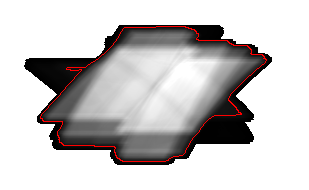

In [6]:
stats([release_path+'/maps/s13/act_dr4_s13_D1_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits'])

/global/cfs/projectdirs/act/data/20191125_actpol_dr4//maps/s13/act_dr4_s13_D5_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  21.515181949525733  --- Mean of > 5 percent:  16.442543073638564
Area:  157.64370377188592


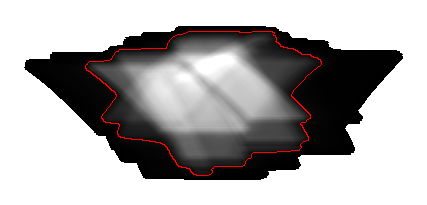

In [7]:
stats([release_path+'/maps/s13/act_dr4_s13_D5_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits'])

/global/cfs/projectdirs/act/data/20191125_actpol_dr4//maps/s13/act_dr4_s13_D6_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  17.005752449305934  --- Mean of > 5 percent:  12.627744264380699
Area:  135.1591199951118


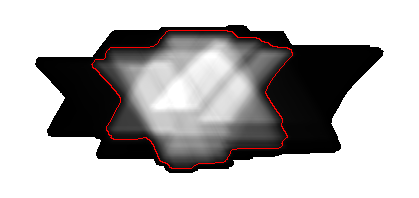

In [8]:
stats([release_path+'/maps/s13/act_dr4_s13_D6_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits'])

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s14/act_dr4_s14_D56_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  35.04084288044971  --- Mean of > 5 percent:  32.278387597134405
Area:  834.1755962235437


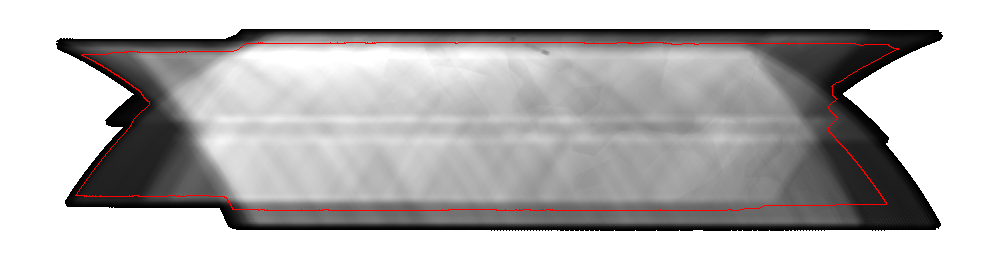

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s14/act_dr4_s14_D56_pa2_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  22.05929214424751  --- Mean of > 5 percent:  20.459454956842748
Area:  834.1755962235437


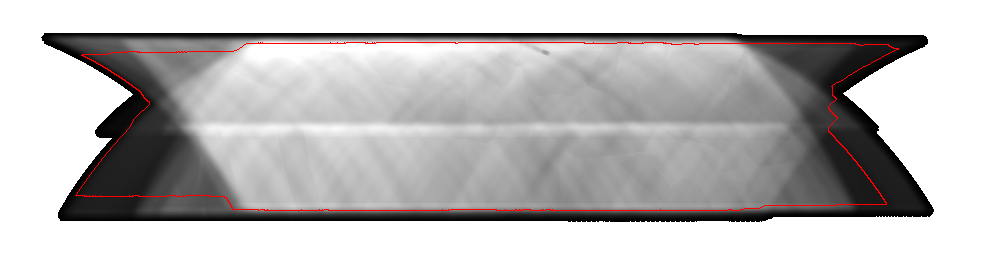

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_D56_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  36.20819485842492  --- Mean of > 5 percent:  33.30833785799078
Area:  834.1755962235437


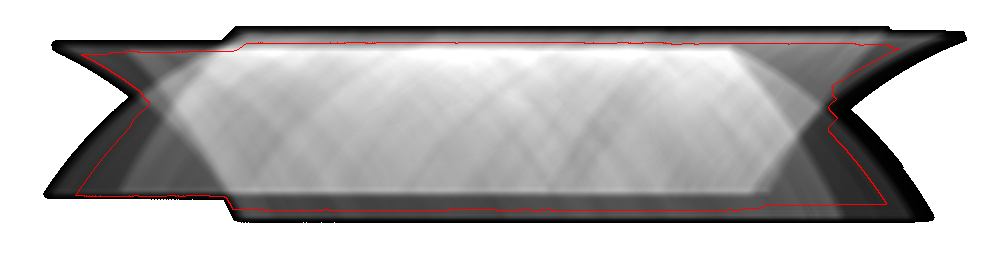

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_D56_pa2_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  23.44474234453583  --- Mean of > 5 percent:  21.929516640005833
Area:  834.1755962235437


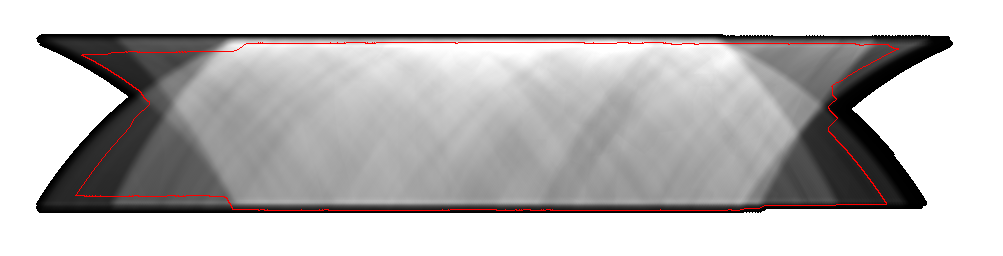

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_D56_pa3_f090_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  19.734075458321282  --- Mean of > 5 percent:  18.34695680651528
Area:  834.1755962235437


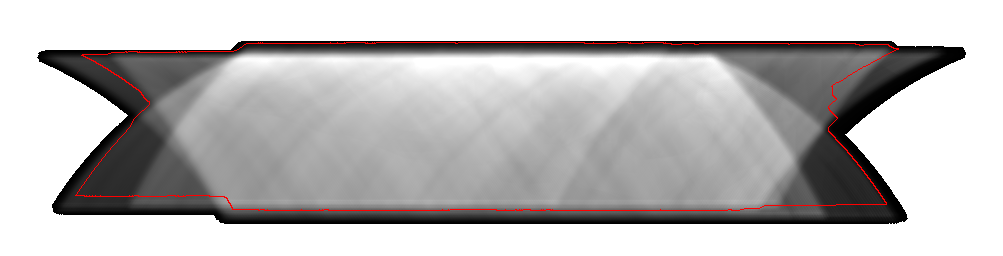

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_D56_pa3_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  30.755038730871124  --- Mean of > 5 percent:  28.623224731707722
Area:  834.1755962235437


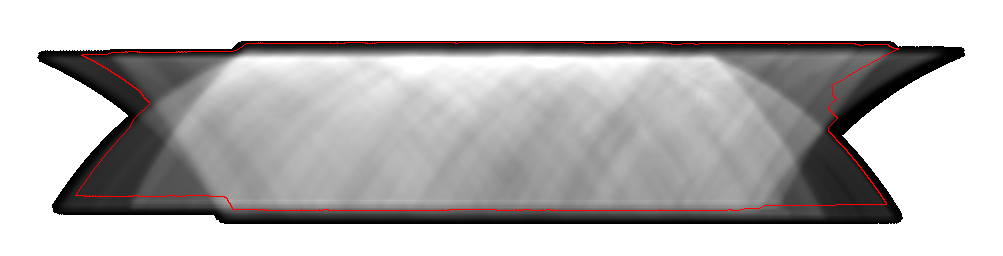

In [9]:
stats(sorted(gl.glob(release_path+'maps/s1*/*D56*coadd_ivar.fits')))

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_BN_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  79.12348892759817  --- Mean of > 5 percent:  76.79123258065125
Area:  3157.44869075307


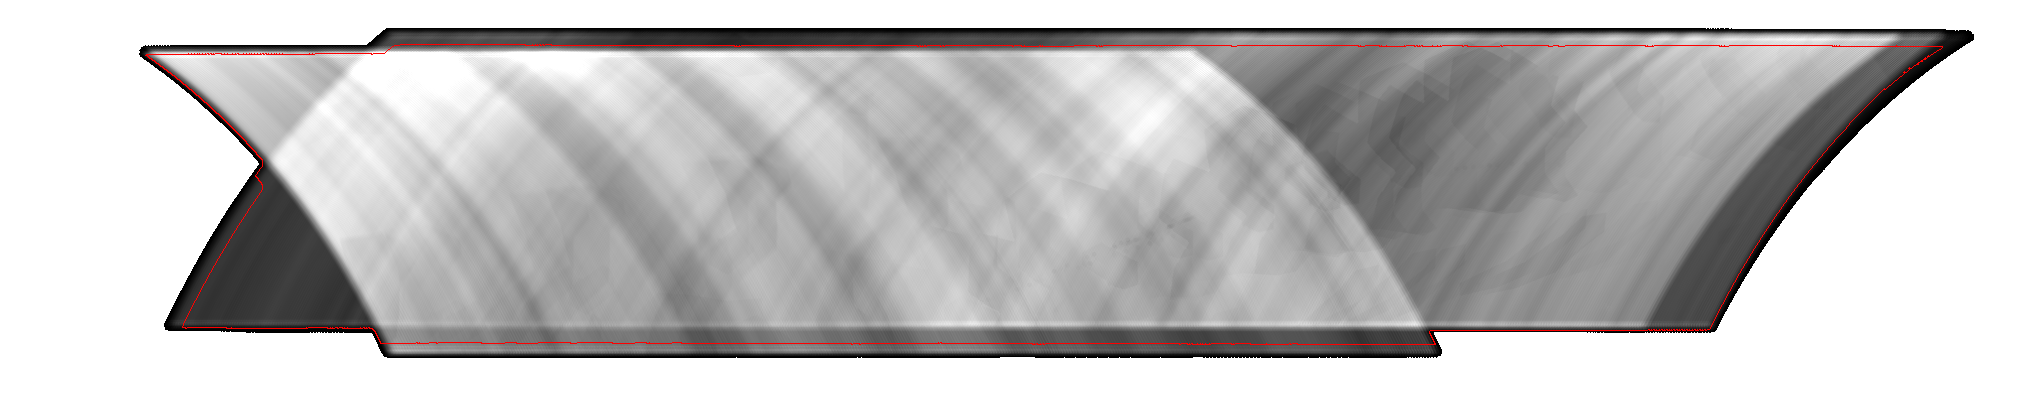

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_BN_pa2_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  42.2685105384594  --- Mean of > 5 percent:  41.28042513219301
Area:  3157.44869075307


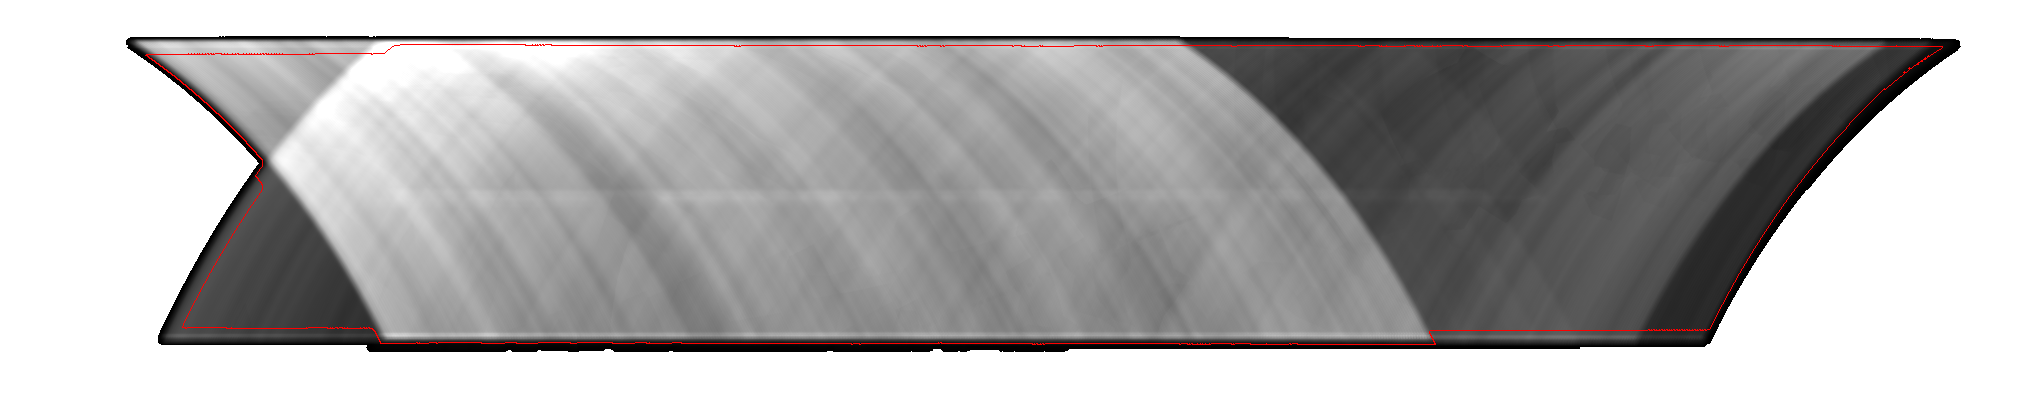

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_BN_pa3_f090_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  35.20060646670756  --- Mean of > 5 percent:  33.88041209401454
Area:  3157.44869075307


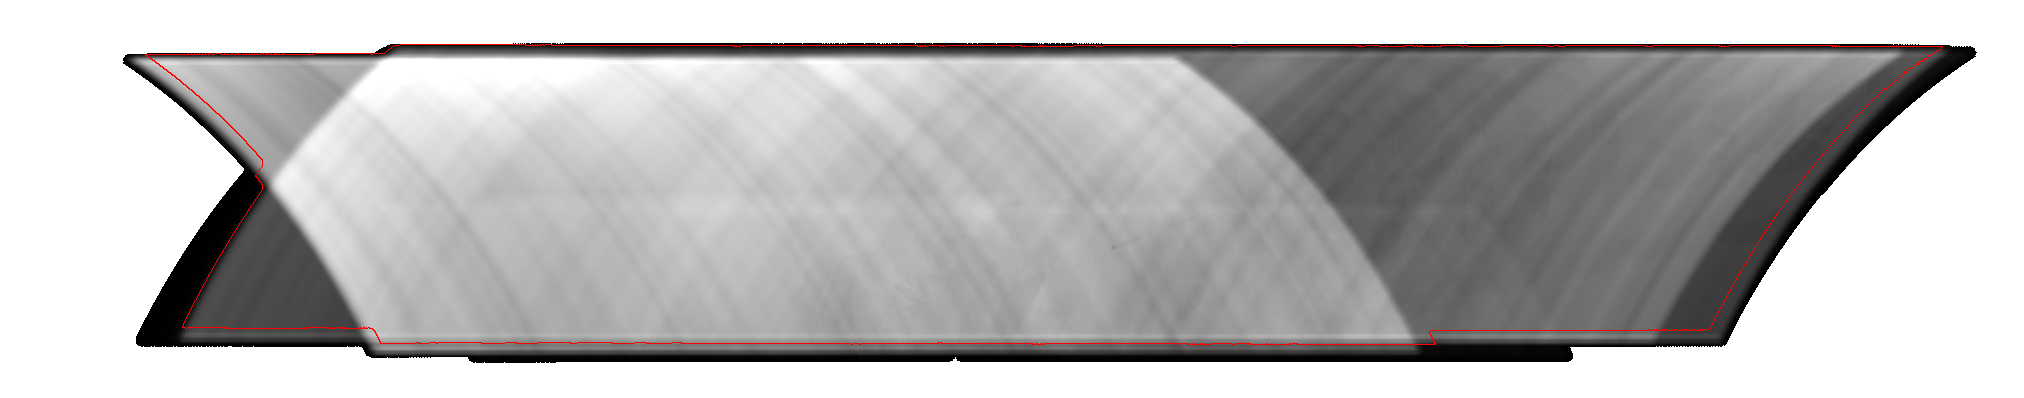

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_BN_pa3_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  51.00025507584365  --- Mean of > 5 percent:  49.121952120037214
Area:  3157.44869075307


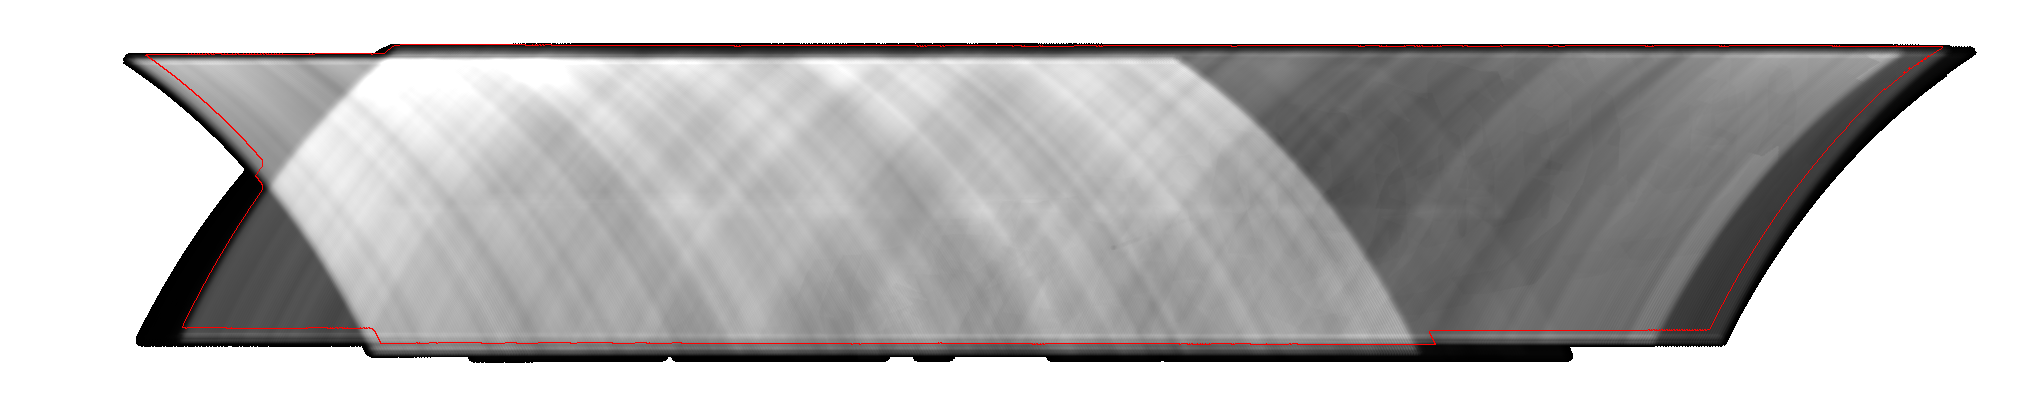

In [10]:
stats(sorted(gl.glob(release_path+'maps/s1*/*BN*coadd_ivar.fits')))

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_D8_pa1_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  45.85282549726895  --- Mean of > 5 percent:  41.982293053729784
Area:  248.52518166302474


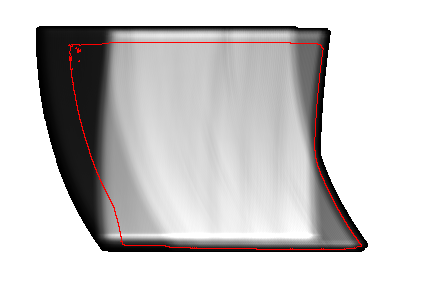

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_D8_pa2_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  23.370206771056445  --- Mean of > 5 percent:  21.496596020495076
Area:  248.52518166302474


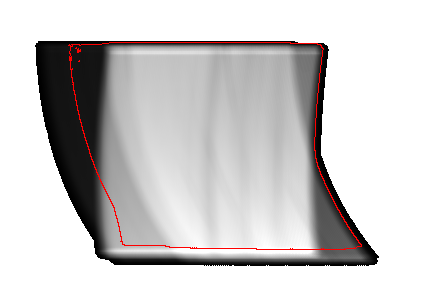

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_D8_pa3_f090_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  21.505356702132104  --- Mean of > 5 percent:  19.911614757834784
Area:  248.52518166302474


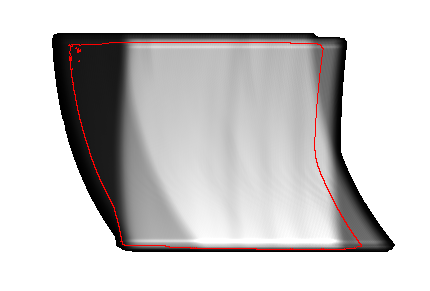

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s15/act_dr4_s15_D8_pa3_f150_nohwp_night_3pass_4way_coadd_ivar.fits
Mean of Obs:  31.398431690183397  --- Mean of > 5 percent:  28.98105257434797
Area:  248.52518166302474


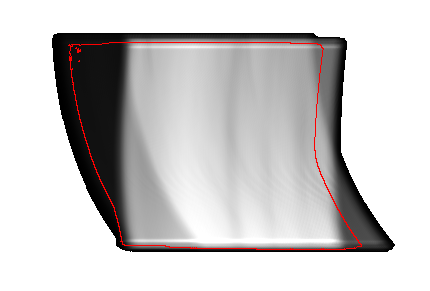

In [11]:
stats(sorted(gl.glob(release_path+'maps/s1*/*D8*coadd_ivar.fits')))

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s16/act_dr4_s16_AA_pa2_f150_nohwp_night_3pass_2way_coadd_ivar.fits
Mean of Obs:  75.47734802114167  --- Mean of > 5 percent:  72.92718873615819
Area:  17044.126154043795


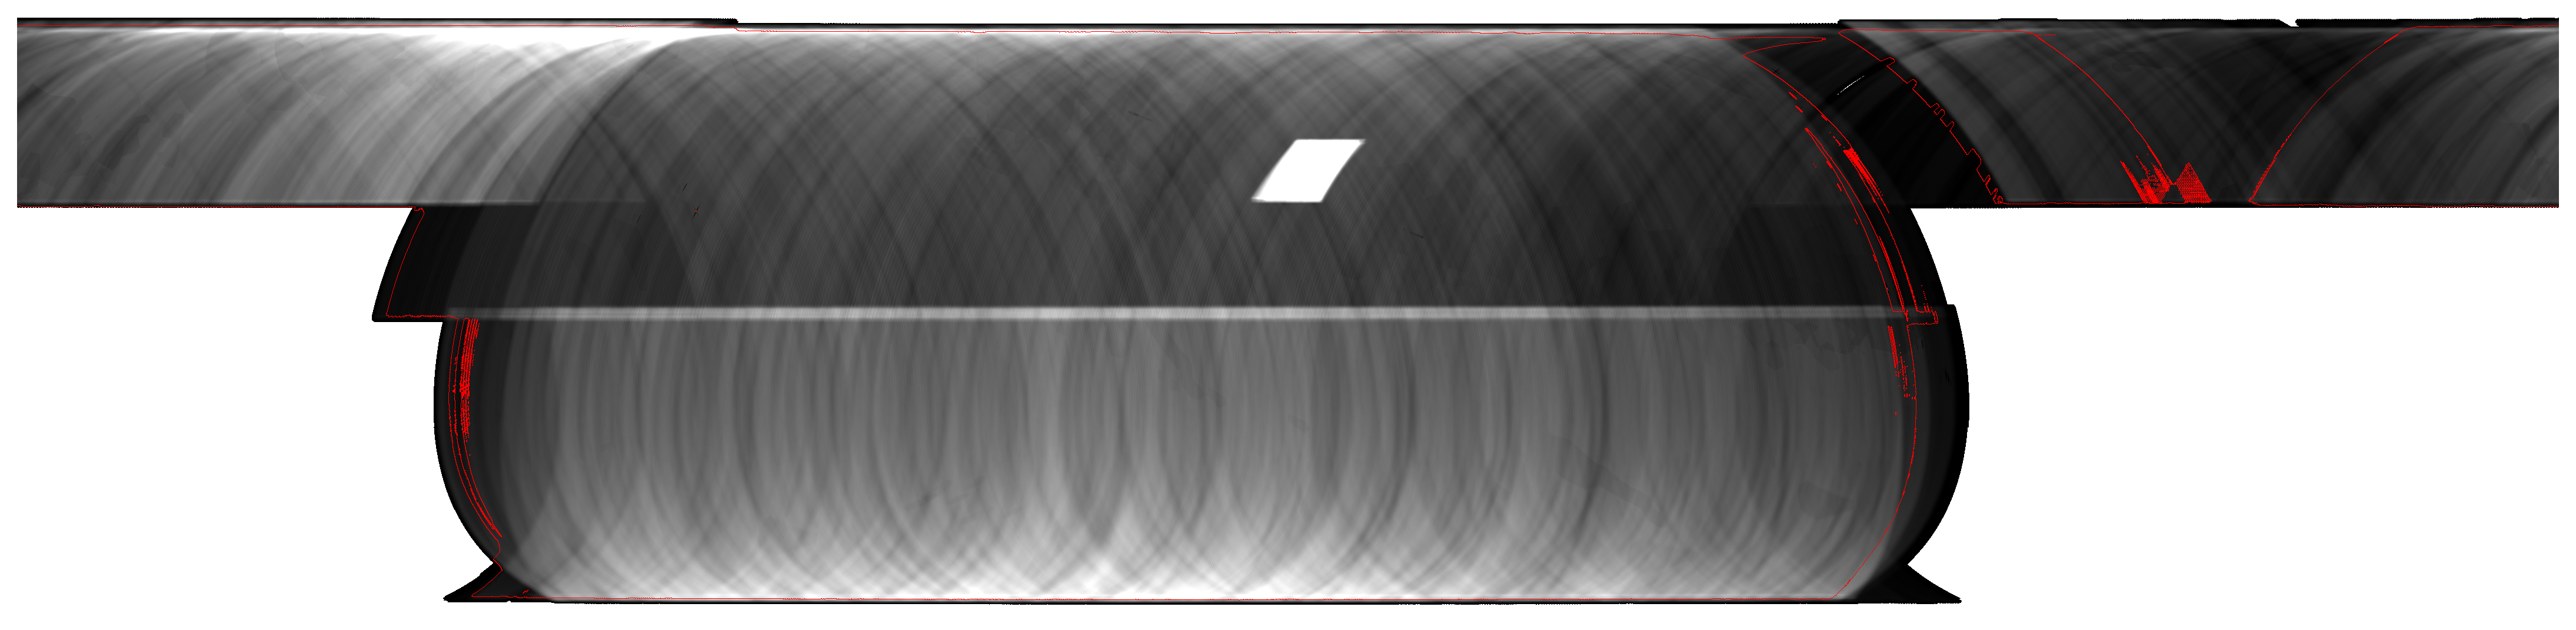

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s16/act_dr4_s16_AA_pa3_f090_nohwp_night_3pass_2way_coadd_ivar.fits
Mean of Obs:  81.55195523245717  --- Mean of > 5 percent:  78.72627052029405
Area:  17044.126154043795


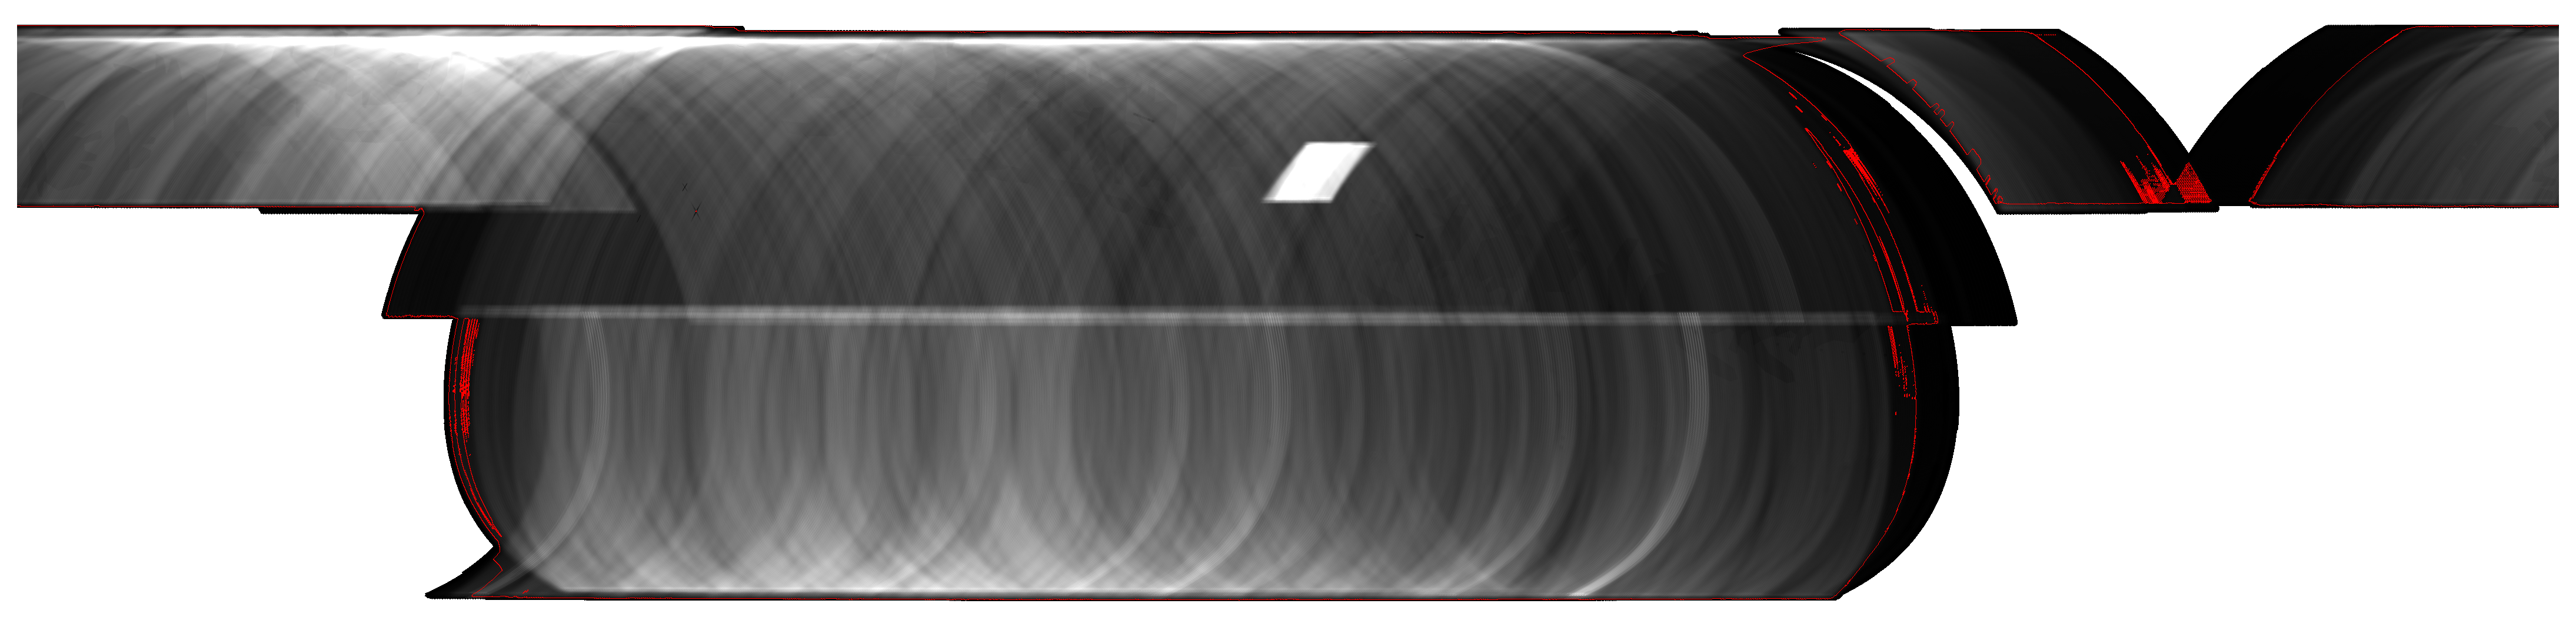

/global/cfs/projectdirs/act/data/20191125_actpol_dr4/maps/s16/act_dr4_s16_AA_pa3_f150_nohwp_night_3pass_2way_coadd_ivar.fits
Mean of Obs:  121.44286051969053  --- Mean of > 5 percent:  118.53449487985715
Area:  17044.126154043795


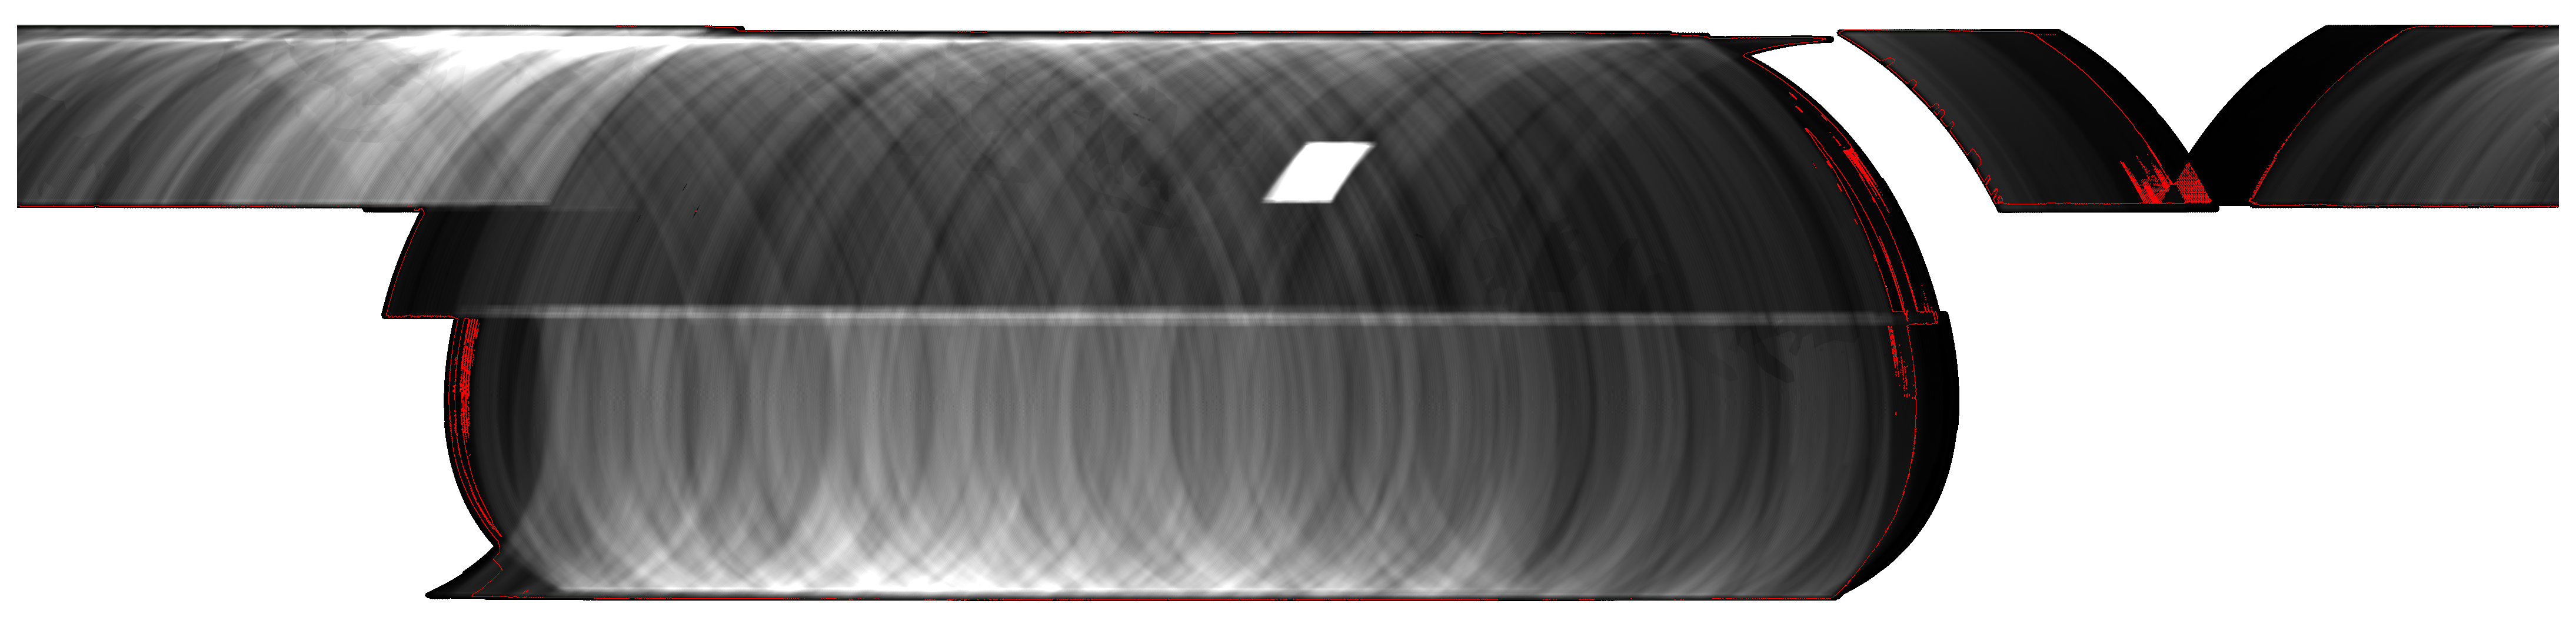

In [12]:
stats(sorted(gl.glob(release_path+'maps/s1*/*AA*coadd_ivar.fits')))